<a href="https://colab.research.google.com/github/KomalKolte2001/Task/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

### Importing Library like Numpy,Panda and Matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Get the Dataset where it is Recently present ie. Read the csv file using Pandas library

In [ ]:
Dataset_Path = "Iris.csv"

In [ ]:
dataset = pd.read_csv(Dataset_Path)
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.shape

(150, 6)

### Delete the Last column from the dataset and Pre-procesing of new dataset

In [ ]:
x = dataset.iloc[:, :5]

In [ ]:
print(x)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


### shape and columns of the Dataset

In [ ]:
x.shape   

(150, 5)

In [ ]:
x.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

### Finding the Null value

In [ ]:
x.isnull().sum()   

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

### mathematical description of the dataset

In [ ]:
x.describe()    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### To normalize the dataset

In [ ]:
def normalize_dataset(dataset):
    return (dataset - dataset.mean(axis=0)) / dataset.std(axis=0)


In [ ]:
x = normalize_dataset(x)

### Ploting boxplot of the dataset

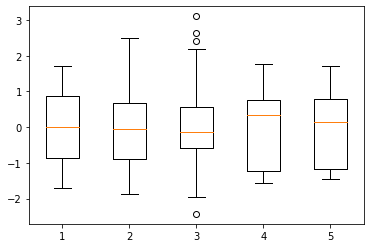

In [ ]:
plt.boxplot(x)
plt.show()

### PCA Implementation

In [ ]:
def PCA(data, n_comps):
    data = np.array(data)

    # Creating the mean vector
    mean_vector = np.mean(data, axis=0)

    # The Convariance matrix:
    conv_matrix = np.cov(data - mean_vector, rowvar=False)

    # Getting the eigenVectors
    eig_value, eig_vector = np.linalg.eig(conv_matrix)

    # Sort the Eigen Values in descending order
    eig_value = np.argsort(-eig_value)

    # Select the top "n_comps" from the list
    eig_ValueTopN = eig_value[:n_comps]

    Final_Data = eig_vector[:, eig_ValueTopN]

    Final_Data = np.dot(data, Final_Data)

    return eig_value, Final_Data

In [ ]:
eig_Values, PCAdata = PCA(x, 3)

In [ ]:
print('Eigen Values:', eig_Values)

Eigen Values: [0 1 2 3 4]


In [ ]:
print('PCAdata:', PCAdata)

PCAdata: [[ 2.80693543e+00  5.04360986e-01  3.67918222e-01]
 [ 2.63669428e+00 -6.49623081e-01  5.12852539e-01]
 [ 2.86986634e+00 -3.19963951e-01  2.07486367e-01]
 [ 2.80154900e+00 -5.75435445e-01  1.92316536e-01]
 [ 2.87026785e+00  6.68229014e-01  1.64683001e-01]
 [ 2.58451761e+00  1.51374801e+00  2.43446732e-01]
 [ 2.89190339e+00  6.74846155e-02 -7.65667392e-02]
 [ 2.70108967e+00  2.44004697e-01  2.52153577e-01]
 [ 2.77642317e+00 -1.09666299e+00  7.79162845e-02]
 [ 2.63844279e+00 -4.49511705e-01  3.58040182e-01]
 [ 2.61171000e+00  1.06396852e+00  3.27505932e-01]
 [ 2.73613399e+00  1.51182211e-01  4.17609099e-02]
 [ 2.63481483e+00 -7.11258667e-01  2.89330935e-01]
 [ 2.98136522e+00 -9.48186596e-01 -1.38279019e-01]
 [ 2.59809936e+00  1.87818056e+00  3.64834184e-01]
 [ 2.63662530e+00  2.70472140e+00 -9.24472947e-03]
 [ 2.57843955e+00  1.50101670e+00  4.27665587e-02]
 [ 2.55274051e+00  5.05098239e-01  7.90938616e-02]
 [ 2.29035893e+00  1.42380799e+00  3.63819974e-01]
 [ 2.66211604e+00  1.1

### Plotting out a scatter plot for Visualisation

Text(0.5, 0.92, '3D scatter plot for the IrisDataSet after PCA')

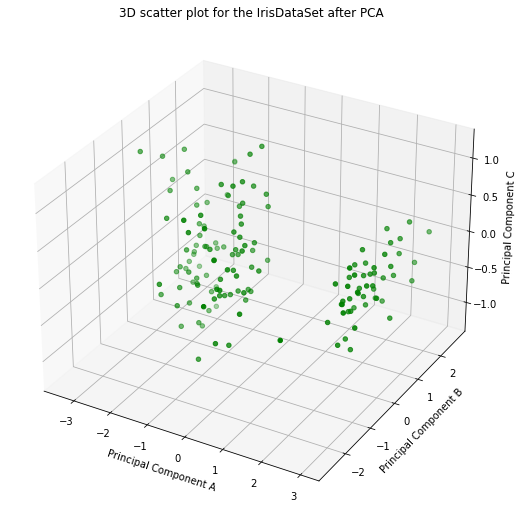

In [ ]:

# Setting a larger size for easier viewing
fig = plt.figure(figsize = (12, 9))
ax = plt.axes(projection ="3d")
# Plotting the datapoints
ax.scatter3D(PCAdata[:, 0], PCAdata[:, 1], PCAdata[:, 2], color = "green")
ax.set_xlabel('Principal Component A')
ax.set_ylabel('Principal Component B')
ax.set_zlabel('Principal Component C')
plt.title("3D scatter plot for the IrisDataSet after PCA")

In [ ]:
df = pd.DataFrame(data = PCAdata, columns = ["Feature 1", "Feature 2", "Feature 3"])
print(df)

     Feature 1  Feature 2  Feature 3
0     2.806935   0.504361   0.367918
1     2.636694  -0.649623   0.512853
2     2.869866  -0.319964   0.207486
3     2.801549  -0.575435   0.192317
4     2.870268   0.668229   0.164683
..         ...        ...        ...
145  -2.416327   0.375860  -0.560077
146  -2.156994  -0.912639  -0.485727
147  -2.132652   0.253423  -0.671750
148  -2.022704   0.995390  -1.234230
149  -1.669242  -0.046058  -1.127658

[150 rows x 3 columns]


In [ ]:
finalDf = pd.concat([df, dataset.iloc[:,-1]], axis = 1)
print(df)

     Feature 1  Feature 2  Feature 3
0     2.806935   0.504361   0.367918
1     2.636694  -0.649623   0.512853
2     2.869866  -0.319964   0.207486
3     2.801549  -0.575435   0.192317
4     2.870268   0.668229   0.164683
..         ...        ...        ...
145  -2.416327   0.375860  -0.560077
146  -2.156994  -0.912639  -0.485727
147  -2.132652   0.253423  -0.671750
148  -2.022704   0.995390  -1.234230
149  -1.669242  -0.046058  -1.127658

[150 rows x 3 columns]


In [ ]:
print(finalDf)

     Feature 1  Feature 2  Feature 3         Species
0     2.806935   0.504361   0.367918     Iris-setosa
1     2.636694  -0.649623   0.512853     Iris-setosa
2     2.869866  -0.319964   0.207486     Iris-setosa
3     2.801549  -0.575435   0.192317     Iris-setosa
4     2.870268   0.668229   0.164683     Iris-setosa
..         ...        ...        ...             ...
145  -2.416327   0.375860  -0.560077  Iris-virginica
146  -2.156994  -0.912639  -0.485727  Iris-virginica
147  -2.132652   0.253423  -0.671750  Iris-virginica
148  -2.022704   0.995390  -1.234230  Iris-virginica
149  -1.669242  -0.046058  -1.127658  Iris-virginica

[150 rows x 4 columns]


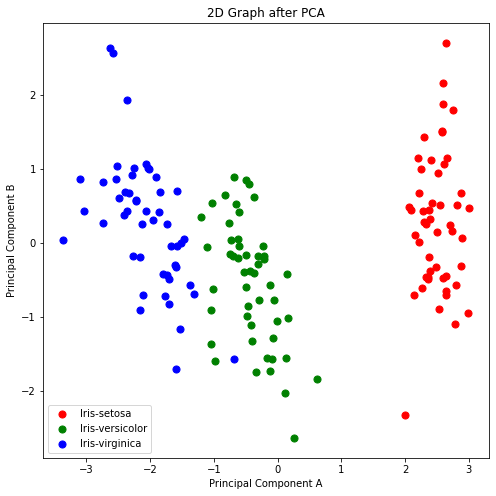

In [ ]:
plot = plt.figure(figsize = (8,8))
ax = plot.add_subplot(1,1,1)
ax.set_xlabel('Principal Component A')
ax.set_ylabel('Principal Component B')
ax.set_title('2D Graph after PCA')

IrisTypes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for IrisType, color in zip(IrisTypes,colors):
    indicesToKeep = finalDf['Species'] == IrisType
    ax.scatter(finalDf.loc[indicesToKeep, 'Feature 1']
               , finalDf.loc[indicesToKeep, 'Feature 2']
               , c = color
               , s = 50)
ax.legend(IrisTypes)


### K Meams Cultering algorithm

In [ ]:
data = x.values
data

array([[-1.71479731e+00, -8.97673879e-01,  1.02861128e+00,
        -1.33679402e+00, -1.30859282e+00],
       [-1.69177989e+00, -1.13920048e+00, -1.24540379e-01,
        -1.33679402e+00, -1.30859282e+00],
       [-1.66876248e+00, -1.38072709e+00,  3.36720285e-01,
        -1.39346985e+00, -1.30859282e+00],
       [-1.64574507e+00, -1.50149039e+00,  1.06089953e-01,
        -1.28011819e+00, -1.30859282e+00],
       [-1.62272765e+00, -1.01843718e+00,  1.25924161e+00,
        -1.33679402e+00, -1.30859282e+00],
       [-1.59971024e+00, -5.35383973e-01,  1.95113261e+00,
        -1.16676652e+00, -1.04652483e+00],
       [-1.57669283e+00, -1.50149039e+00,  7.97980949e-01,
        -1.33679402e+00, -1.17755883e+00],
       [-1.55367541e+00, -1.01843718e+00,  7.97980949e-01,
        -1.28011819e+00, -1.30859282e+00],
       [-1.53065800e+00, -1.74301699e+00, -3.55170711e-01,
        -1.33679402e+00, -1.30859282e+00],
       [-1.50764058e+00, -1.13920048e+00,  1.06089953e-01,
        -1.28011819e+00

In [ ]:
def kmeans(x, k, num_iterations=100):
    # Randomly initialize centroids
    centroids = x[np.random.choice(range(len(x)), k, replace=False)]

    for _ in range(num_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
        cluster = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([x[cluster == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return cluster

### Number of clusters

In [ ]:
k = 3  
cluster = kmeans(data, k)

### Ploting the Kmean

Text(0.5, 1.0, ' Output')

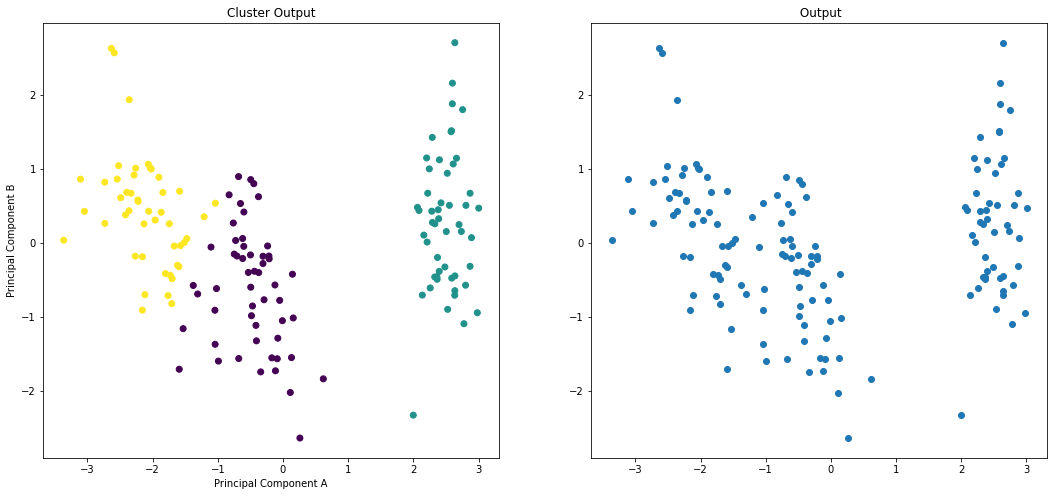

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].scatter(PCAdata[:, 0], PCAdata[:, 1], c=cluster)
axs[0].set_xlabel('Principal Component A')
axs[0].set_ylabel('Principal Component B')
axs[0].set_title('Cluster Output')

axs[1].scatter(PCAdata[:, 0], PCAdata[:, 1])
axs[1].set_title(' Output')
